<a href="https://colab.research.google.com/github/Krithika-Devi/training/blob/main/04_3_EDA_Visuals_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Data Science & Analysis 
## Notes 3.1, Exploratory Data Analysis & Visualization

## Objectives
* write a program which uses seaborn to:
    * show univariate plots (eg., distplot)
    * show multivariate plots (eg., scatterplot)
    * EXTRA: customize plots

In [1]:
import pandas as pd
ti = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/CDB22DW022/main/titanic.csv')
ti.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [2]:
import seaborn as sns

### Checks for emptiness and cleanse data

In [3]:
ti.isna().sum() #check for emptiness

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
#replace NaNs in numerical fields with the mean values
ti=ti.fillna(ti.mean()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [5]:
ti.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# fill every column with its own most frequent value 
ti = ti.apply(lambda x:x.fillna(x.value_counts().index[0])) #categorical columns

In [7]:
ti.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

## Exercise (30 min)

## Step 1 (5 min)
* review seaborn individual, try a few plots

The scatterplot() is the default kind in relplot() 

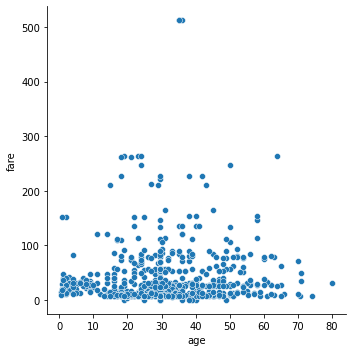

In [8]:
sns.relplot(x="age",y="fare",data=ti)

In the below scatter plot, we see that passenger at class 1 fare is extremely high when compared to other classes 2 and 3.

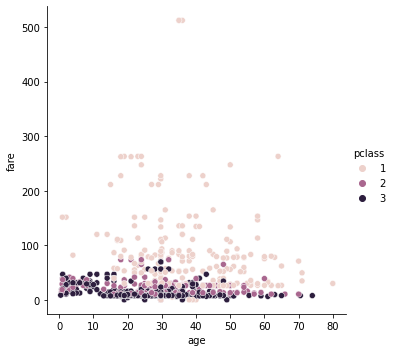

In [9]:
sns.relplot(x="age",y="fare",hue='pclass',data=ti)

The default approach in displot(), uses the same underlying code as histplot(). A histogram is a bar plot where the axis representing the data variable is divided into a set of discrete bins and the count of observations falling within each bin is shown using the height of the corresponding bar.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


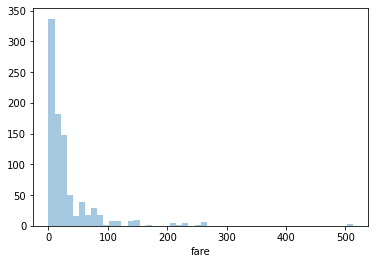

In [10]:
sns.distplot(ti['fare'],kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


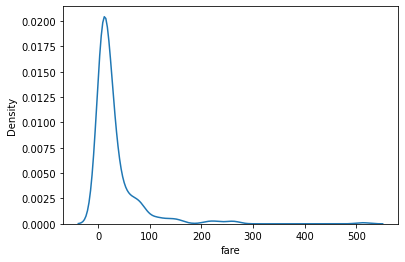

In [11]:
sns.distplot(ti['fare'],hist=False)

**catplot()** is to adjust the positions of points on the categorical axis.

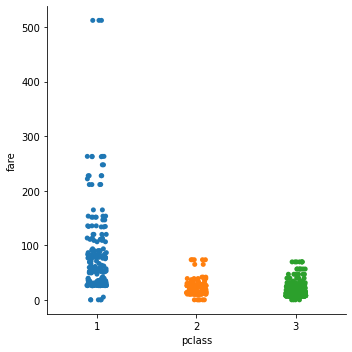

In [12]:
sns.catplot(x='pclass',y='fare',data=ti)

The **jitter** parameter controls the magnitude of jitter or disables it altogether:

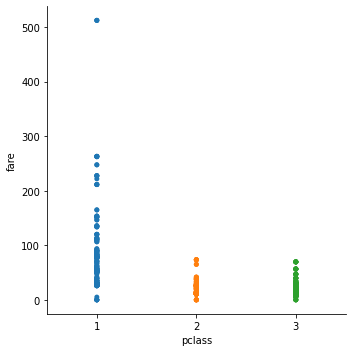

In [13]:
sns.catplot(x='pclass',y='fare',jitter = False,data=ti)

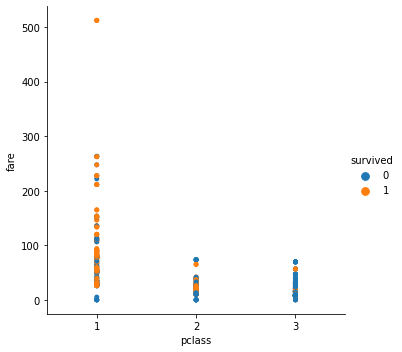

In [14]:
sns.catplot(x='pclass',y='fare',jitter=False,hue='survived',data=ti)

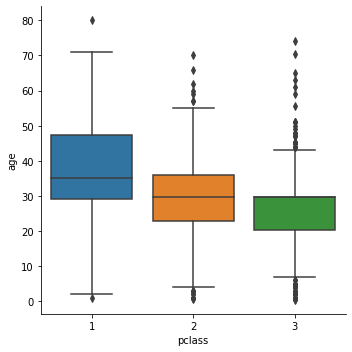

In [15]:
sns.catplot(x='pclass',y='age',kind='box',data=ti) #using catplot, we can also plot box plot.

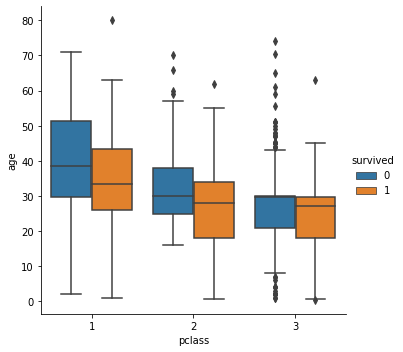

In [16]:
sns.catplot(x='pclass',y='age',hue='survived',kind='box',data=ti) #using catplot, we can also plot box plot.

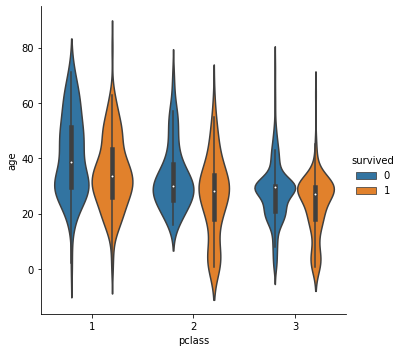

In [17]:
sns.catplot(x='pclass',y='age',hue='survived',kind='violin',data=ti) #using catplot, we can also plot violin plot.

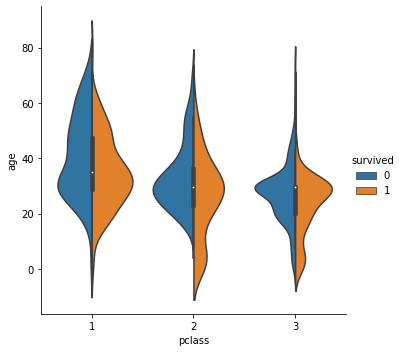

In [18]:
sns.catplot(x='pclass',y='age',hue='survived',kind='violin',split=True,data=ti) #using catplot, we can also plot violin plot.

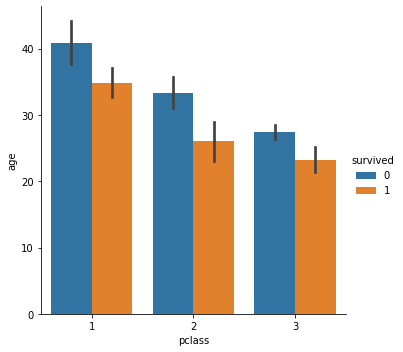

In [19]:
sns.catplot(x='pclass',y='age',hue='survived',kind='bar',data=ti) #using catplot, we can also plot box plot.

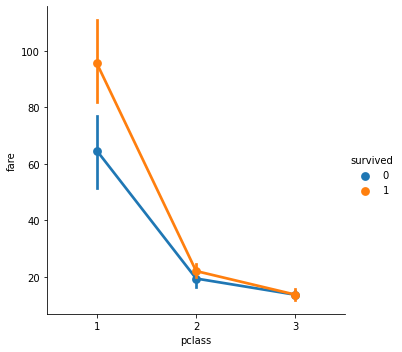

In [20]:
sns.catplot(x='pclass',y='fare',hue='survived',kind='point',data=ti) 

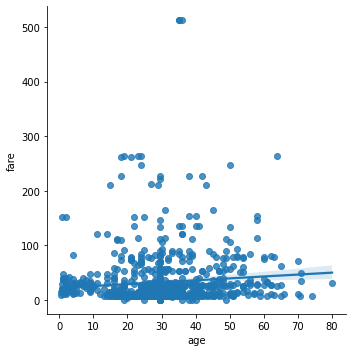

In [21]:
sns.lmplot(x='age',y='fare',data=ti)

## Step 2 (25 min)

* What affected your chances of survival on the titanic?
    * brainstorm & execute an analysis of the titanic dataset
* Consider:
    * old vs. young
    * women vs. men
    * women & children vs. men
    * cheaper vs. expensive tickets
    * deck
    * class
    * ...location...
* Use seaborn plots (and pandas) to obtain helpful visuals which answer the investigatory question. 

From the below plot, we see that most passengers survived at class 1 comparatively to other classes in addition to the passenger at class 1 fare is extremely high when compared to other classes 2 and 3.

At class 1, we see that:
1. Fare is expensive
2. Old age person are more in number

Thus, if maximum number of passengers were in class, there will be a high probability survival rate instead of not survived.

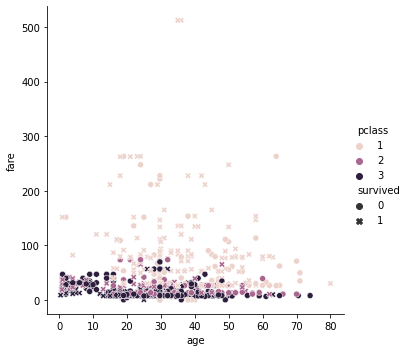

In [22]:
sns.relplot(x="age",y="fare",hue='pclass',style = 'survived',data=ti)

In [23]:
ti['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

Thus, from the below plot we see that children survival rate is not satisfactory compared to adults(man&woman). Because, we have seen that highest fare are at pclass 1 and they have high probability of survival.

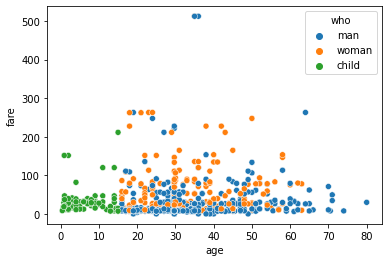

In [24]:
sns.scatterplot(data=ti,x='age',y='fare',hue='who')

In [25]:
df = pd.get_dummies(ti.who)

In [26]:
df

,child,man,woman
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
886,0,1,0
887,0,0,1
888,0,0,1
889,0,1,0


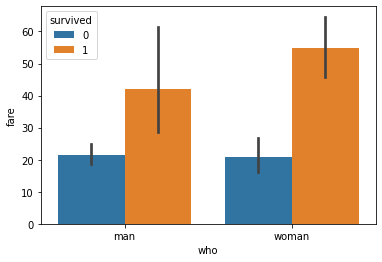

In [27]:
sns.barplot(data=ti,x='who',y='fare',hue='survived',order=['man','woman'])

In [28]:
ti['deck'].value_counts()

C    747
B     47
D     33
E     32
A     15
F     13
G      4
Name: deck, dtype: int64

At deck E, many number of passenger is not survived compared to all decks.

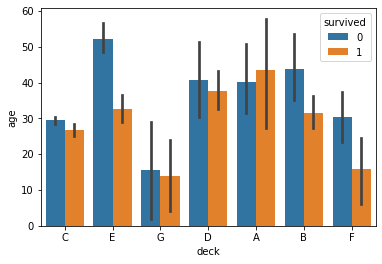

In [29]:
sns.barplot(data=ti,x='deck',y='age',hue='survived')

Frequency of Survived and non-survived person corresponding to cheaper vs. expensive ticket fare and passenger class.

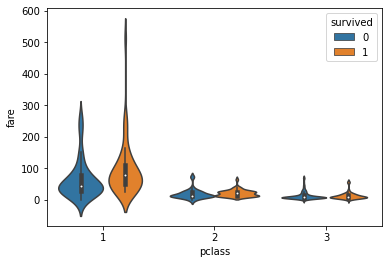

In [30]:
sns.violinplot(data=ti,x='pclass',y='fare',hue='survived')

In [31]:
ti['embark_town'].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

Passengers from 'Cherbourg' location got survived more in number compared to other two location.

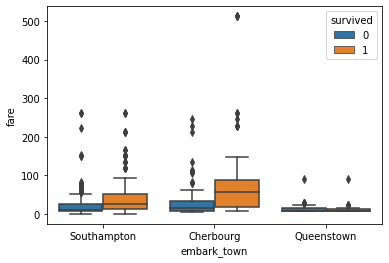

In [32]:
sns.boxplot(data=ti,x='embark_town',y='fare',hue='survived')

In [33]:
ti['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [34]:
ti['adult_male'].value_counts()

True     537
False    354
Name: adult_male, dtype: int64

In [35]:
ti['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

### Consider:
* Univariate (single-col) plots
    * sns.distplot 
        * of survived
    * sns.violinplot 
        * of fare
    * sns.boxplot
        * of age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


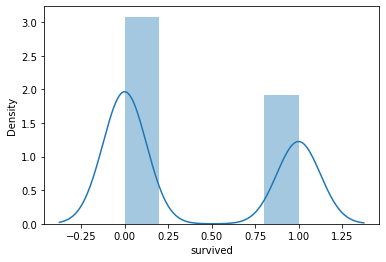

In [36]:
sns.distplot(ti['survived'],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


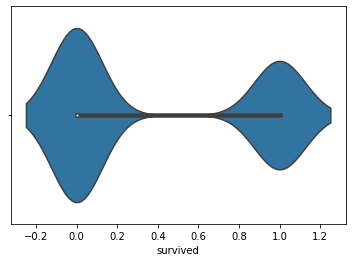

In [37]:
sns.violinplot(ti['survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


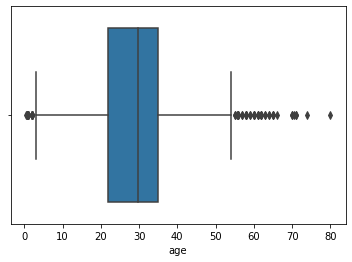

In [38]:
sns.boxplot('age',data=ti)

* Multivariate (here: 2-col) plots
    * sns.violinplot
        * age by survived
        * fare by survived
    * sns.lineplot
        * fare vs. age
    * sns.scatterplot
        * age vs. fare

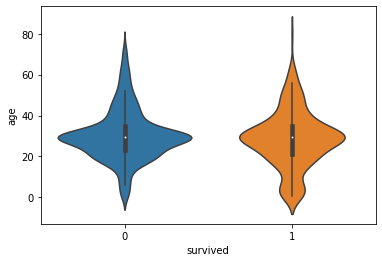

In [39]:
sns.violinplot(x='survived',y='age',data=ti)

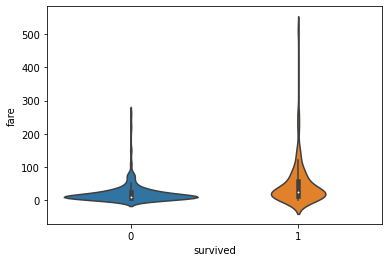

In [40]:
sns.violinplot(x='survived',y='fare',data=ti)

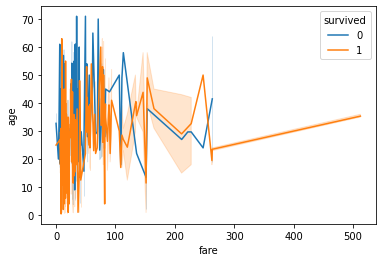

In [41]:
sns.lineplot(x='fare',y='age',hue='survived',data=ti)

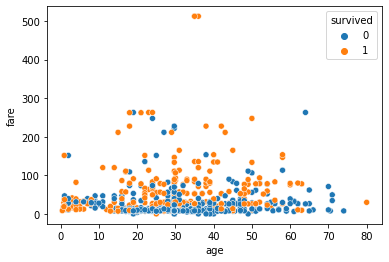

In [42]:
sns.scatterplot(x='age',y='fare',hue='survived',data=ti)